# Homework 4 - Neural Network Deep Dive

Rob Johnston and Haris Memic

The goal of this homework was to explore various techniques to predict images from the <a href = "https://www.cs.toronto.edu/~kriz/cifar.html">CIFAR-10 dataset</a>

In order to provide results for this homework we had to first setup our environments as we soon realised that the limited personal computing resources we had available to us wasn't going to be sufficient for this task. The two members approached this in a different manner: Haris chose to use AWS whilst Rob chose to build a GPU enabled workstation. Both approaches are detailed at the end of this submission.

Once we had the tools in place we wrote code to test out our theories and garner results for this homework. As our models each individually took considerable time to train, we saved the parameters of each run together with the predictions. Throughout this notebook we load in the result files rather than computing the results. We do not include the CIFAR-10 dataset; please copy it into the homework submission.

<img src="code.png" width=200/>


* The <code>dataset.py</code> contains code for reading the files and doing some simple pre-processing.
* <code>splitdataset.py</code> assisted with Q3 and allowed us to split the dataset into four smaller chunks.
* <code>baseline_lr</code> was our baseline Linear Regression implementation (containing also code for K.N. classifier).
* <code>baseline_nn</code> implemented our 'simple' baseline Neural Network code.
* <code>baseline_cnn</code> was our baseline implementation of a Convolutional Neural Network
* <code>baseline_axn</code> was a modification of the AlexNet implementation discussed in section.
* <code>baseline_axn2</code> was a more complex implementation of AlexNet
* <code>baseline.py</code> assisted with running the neural net family of models and stored the results to disk
* <code>result.py</code> and <code>results.py</code> assisted us in reading in the results for the use in this notebook. All results are stored in the results folder.

Out best model achieved an accuracy of 76%. We will explore the steps we took to achieve this result and the architecture of the best model.

## 3) Baseline runs

For the baseline models we decided to be ambitious and adopt somewhat more complex examples of the best performing multilayer NN model as well as the first multilayer CNN model from the Section 07 with modifications as described below.<br />

### 3a) Generic Deep Neural Network

The decision was made to use the batch size of 128 (one of the recommendations from the lecture) and lambda regularisation of 0.001. We used 1024 (1st), 512 (2nd) and 254 (3rd H.L) hidden nodes (purposely we didn’t increase these numbers for our baseline model so we can leave some room for improvement for later parts of the homework) for the same reasons for which we also didn’t do any node dropout.<br /><br />
For the details of implementation of this baseline NN model please see the code attached named <code> baseline_nn.py </code>


This first neural network uses gradient descent as the optimizer.
Starting with learning rate of 0.5 we were only able to achieve test accuracy of 10.0% which amounted to a random guess as we had 10 label options for our classification task. 
Eventually we realised that the GradientDescentOptimizer wasn’t actually converging. Noting that gradient descent converges if the learning rate is sufficiently small, we decrease the learning rate initially to 0.1, which made the classifiers “work” - classifying correctly more than 50% of the test data after "only" 10,000 mini-batches. Further decrease of the learning rate to 0.01 slightly improved the accuracy, whereas decrease to 0.001 didn't seem to produce additional improvements. We therefore settled for learning rate of 0.01 for our baseline models.<br />
<br >Our final baseline NN model was thus run with the following hyper-parameters:
<code>
batch_size: 256
3 hidden layers of size 1024/512/256
lamb_reg: 0.01
start_learning_rate: 0.01
</code>
and we ran it with 50,000 mini-batches.<br /><br />
It achieved classification accuracy of <b>53.58</b> against the testing dataset.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

def plotAccuracy(title, epochs):
    """ Plot training accuracy against the batch number
    """
    plt.figure()
    plt.title(title)
    plt.xlabel("Batch")
    plt.ylabel("Training Accuracy")
    batch = [entry.epoch for entry in epochs.values()]
    acc = [entry.train_accuracy for entry in epochs.values()]
    plt.scatter(batch, acc)
    plt.show()

/Users/rob/anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Time taken to train model: 3.32 mins
Accuracy of model against test data: 53.58


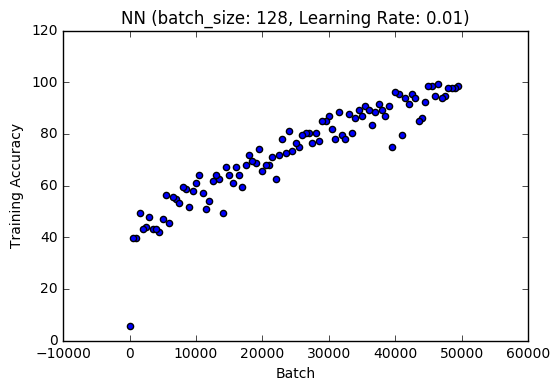

In [2]:
%run 'baseline.py'
%run 'baseline_nn.py'
%run 'result.py'
%run 'results.py'

rs_nn = Results()
rs_nn.load('results/Baseline/baseline_nn')
result_nn = rs_nn.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_nn.params['time']))
print('Accuracy of model against test data: {}'.format(result_nn.params['accuracy']))


plotAccuracy('NN (batch_size: {}, Learning Rate: {})'\
             .format(result_nn.params['batch_size'], result_nn.params['start_learning_rate']), result_nn.epochs)
      

### 3 b) Generic Convolutional Network


For the baseline CNN model we decided to build on the section's CNN network with two convolutional layers followed by one fully connected layer.
Thus we started with patch size of 5, depth (number of features/kernels for each patch) of first convolutional layer of 32, depth of second convolutional layer of 64. We set number of channels to 3 (corresponding to RGB images) but decided to start with batch sizes of 128 instead of 16 (as was in the example from the Section).<br /><br />
Each convolutional layer was followed by pooling (as it is recommended in the literature) - specifically 2x2 pooling layer based on max-pooling which further reduces the dimensionality from the convolutional layer. Additionally, the stride of size 1 in each dimension is used with zero padding. Activation function used for hidden layers is ReLU (considered currently as the generally/practically the best performing one for most of the situations). No dropout was used for the baseline models (to leave room for improvement/experimentation for later hw questions).<br /><br />
For the final fully connected layer we used 1024 neurons.<br /><br />
Our baseline CNN model was thus run with the following hyper-parameters:
<code>
batch_size = 128
patch_size = 5
depth1 = 32
depth2 = 64
final layer nodes = 1024
</code>

For the details of implementation of this baseline CNN model please see the code attached named “<code>baseline_cnn.py</code>”.<br /><br />
Obtained test accuracy for the execution of 50,000 mini-batches outperformed the corresponding accuracy of the baseline NN model, classifying <b>69.04%</b> of the testing data correctly.



Time taken to train model: 10.82 mins
Accuracy of model against test data: 69.04


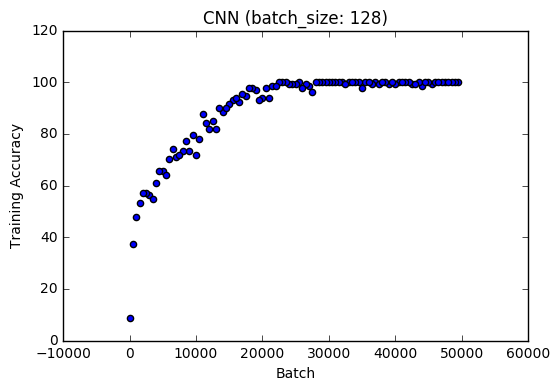

In [3]:
rs_cnn = Results()
rs_cnn.load('results/Baseline/baseline_cnn')
result_cnn = rs_cnn.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_cnn.params['time']))
print('Accuracy of model against test data: {}'.format(result_cnn.params['accuracy']))


plotAccuracy('CNN (batch_size: {})'\
             .format(result_cnn.params['batch_size']), result_cnn.epochs)
      

### 3 c) Generic Non-Neural Network


In order to work toward  Exploratory Points for this task we chose to evalute two different classifiers instead of a single classifier. 
We decided to evaluate and optimise Logistic Regression and KNN classifiers. (In the fact we also shorthly evaluated Quadratic Discriminant Analysis and Gaussian NB but their performance was worser than the two selected classifiers)


We started modelling on the full dataset just to realise that computational time takes quite long to complete for each of the algorithms. As we intended to optimise hyper parameters our best non-NN classifier we decided to evaluate and optimise our preliminary models and the corresponding hyperparameters on 5,000 images from the training dataset.<br />


We initially fitted these two classifiers with the default hyper parameters for logistic regression (C=1) and KNN algorithm with k=1, as in the following:<br />
<code>
clf_LR = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
clf_KNN = KNeighborsClassifier(n_neighbors=1, weights='distance', n_jobs=-1).fit(X_train, y_train)
</code>
<br />to obtain the following accuracy scores:<br />
<code>
5000 samples - LG for valid: 0.299600
5000 samples - LG for test: 0.313400
</code>
<code>
5000 samples - KNN for valid: 0.279000
5000 samples - KNN for test: 0.285200
</code>






These algorithms completely exausted all of the RAM memory of our 60+GB memory Amazon EC2 instance, as it can be seen on the screenshot attached bellow:

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "amazon_memory.png")

Increasing regularisation parameter C to C=10 for Logistic Regression worsened the performance of this classifier to:
<code>
5000 samples - LG for valid: 0.262800
5000 samples - LG for test: 0.275400
</code><br />
for which reason we decreased C to C=0.1 and this we advanced to following accuracy: 
<code>
5000 samples - LG for valid: 0.348600
5000 samples - LG for test: <b>0.365200</b>
</code>


For KNN classifier, increasing k to k=10 resulted in slightly improved performance, namely:
<code>
5000 samples - KNN for valid: 0.298200
5000 samples - KNN for test: <b>0.30200</b>
</code>
<br />
We also experimented with ‘uniform’ weight function for KNN classifier but without success:
<code>
5000 samples - KNN2 for valid: 0.292800
5000 samples - KNN2 for test: 0.287800
</code><br />
We further proceeded to try KNN classifier with k=100. However this resulted in drop of the performance:
<code>
5000 samples - KNN for valid: 0.266800
5000 samples - KNN for test: 0.271600
</code>

Further reducing C regularisation parameter for logistic regression, to value of C=0.01 resulted in so far the best results:
<code>
5000 samples - LG for valid: 0.373600
5000 samples - LG for test: <b>0.389800</b>
</code>


while k=20 for KNN classifier didn’t score better than k=10:
<code>
5000 samples - KNN for valid: 0.293800
5000 samples - KNN for test: 0.295600
</code>

Additional reduction of C regularisation constant to C=0.001 didn’t improve our linear regression model:
<code>
5000 samples - LG for valid: 0.366000
5000 samples - LG for test: 0.372800
</code>

while reducing number of relevant neighbours to 4 for KNN also didn’t produce improvements:
<code>
5000 samples - KNN for valid: 0.291800
5000 samples - KNN for test: 0.293400
</code>

The value of C=0.005 yielded about the same results as the previous best L.R. model.
<code>
5000 samples - LG for valid: 0.378200
5000 samples - LG for test: 0.389000
</code>

while k=8 for KNN slightly decreased the corresponding best result:
<code>
5000 samples - KNN for valid: 0.294800
5000 samples - KNN for test: 0.301200
</code>

Further attempts with C=0.02 as well as k=13 didn’t improve either of the models.<br />

At the end we also decided to try out the suggestion in the literature (“Introduction to Machine Learning with Python” book, by A. Muller) to apply PCA analysis before KNN classification itself. We proceed to apply PCA on our best L.R. and KNN models, by keeping 200 components.<br /><br />
This indeed improved the performance of the KNN classifier to:
<code>
5000 samples - KNN for valid: 0.312000
5000 samples - KNN for test: <b>0.312600<b/>
</code>
which however was still significantly worser then the best performing logistic regression classifier.



We thus decided to stick with our best performing logistic regression classifier for the remaining parts of our homework.
<br /><br />
For the end, however, we fitted our best performing L.R. classifier on the full training dataset, which resulted in the following classification accuracy:
<code>
Validation accuracy: 0.411
Test accuracy: <b>0.414</b>
</code>

In [5]:
rs_lr = Results()
rs_lr.load('results/Baseline/baseline_lr')
result_lr = rs_lr.highest('accuracy')
result_lr.params['accuracy'] = result_lr.params['accuracy'] * 100
print('Time taken to train model: {} mins'.format(result_lr.params['time']))
print('Accuracy of model against test data: {}'.format(result_lr.params['accuracy']))

Time taken to train model: 5.26 mins
Accuracy of model against test data: 41.39


### 3d) Comparison of models

Loading in the predictions and plotting the results showed us:
* The best AUC result was the Convolutional Neural Network (0.95), followed by the Neural Network (0.89) followed lastly by the linear regression model (0.82)
* The accuracy scores reflected the same ranking with CNN at 69.0, NN at 53.58 and LR at 41.39
* There's no such thing as a free lunch, however, with the quickest model being the NN at 3.32 mins, the LR at 5.26 mins and the CNN at 10.82 mins - almost 3 times as slow as the NN

The results come as no surprise given what we've read in the literature; CNNs were better but at a cost of complexity and time to train.

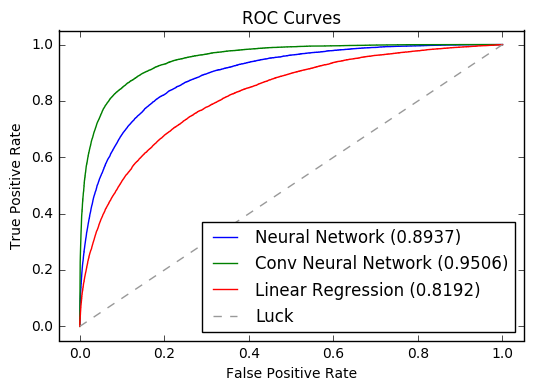

      Time(mins)  Accuracy
LR      5.26        41.39
NN      3.32        53.58
CNN    10.82        69.04


In [6]:
%run 'dataset.py'
from sklearn.metrics import roc_curve, auc

# Load the labels
ds = DataSet(use_valid=False)
ds.load(False )
labels = ds.test_labels


# Compute ROC curve and Area Under the Curve

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_nn.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Neural Network ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_cnn.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Conv Neural Network ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_lr.test_preds.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Linear Regression ({})'.format(roc_auc.round(4)))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

print('      Time(mins)  Accuracy')
print('LR      {}        {}'.format(result_lr.params['time'], result_lr.params['accuracy']))
print('NN      {}        {}'.format(result_nn.params['time'], result_nn.params['accuracy']))
print('CNN    {}        {}'.format(result_cnn.params['time'], result_cnn.params['accuracy']))


## 4) Sensitivity to training data


For this section we split the data into four groups of 12500 entries; dataset A, B, C, D. We then ran four tests on our three models: training with 12500, 25000, 37500 and the the full 50000. We compared the results for each.

All three models got close to their best score after training on only a quarter of the data. However, it is surprising to see the the linear regression model hardly got better after that, whilst the simple neural network (NN) and convolutional neural network (CNN) did see a small increase with more data. This tends to suggest that neural networks do better than traditional methods if they have more data to train on.

The training time for the two neural netowrk models (NN & CNN) did not vary much as the dataset got larger but the linear regression model did. Together with the fact that data is randomly sampled, this is also presumably due to the fact that the number of batches was sufficiently high for the neural net models that data size was negligable in the results. Later, we  will investigate the effect of increasing the number of batches has on neural network training times.

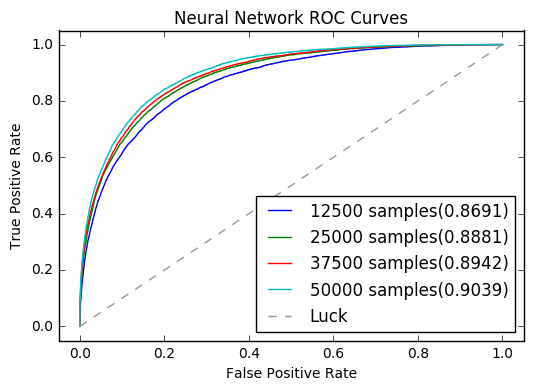

      Time(mins)  Accuracy
12500   1.34      48.97
25000   1.36      51.65
37500   1.37      51.89
50000   1.36      54.23


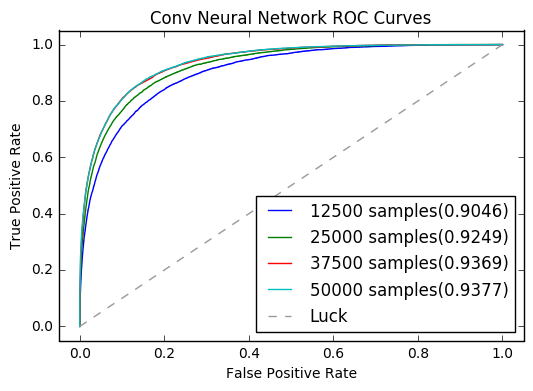

      Time(mins)  Accuracy
12500   4.39      56.72
25000   4.38      61.5
37500   4.39      64.25
50000   4.38      64.15


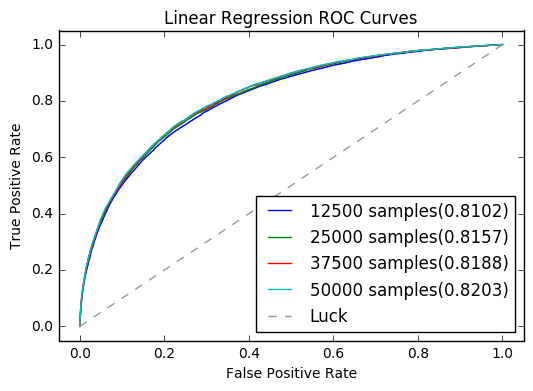

      Time(mins)  Accuracy
12500   1.48      0.4037
25000   3.45      0.4105
37500   5.92      0.4146
50000   9.0      0.4176


In [7]:
rs_nn_a = Results()
rs_nn_a.load('results/Split/split_nn/a')
result_nn_a = rs_nn_a.highest('accuracy')
rs_nn_ab = Results()
rs_nn_ab.load('results/Split/split_nn/ab')
result_nn_ab = rs_nn_ab.highest('accuracy')
rs_nn_abc = Results()
rs_nn_abc.load('results/Split/split_nn/abc')
result_nn_abc = rs_nn_abc.highest('accuracy')
rs_nn_abcd = Results()
rs_nn_abcd.load('results/Split/split_nn/abcd')
result_nn_abcd = rs_nn_abcd.highest('accuracy')

rs_cnn_a = Results()
rs_cnn_a.load('results/Split/split_cnn/a')
result_cnn_a = rs_cnn_a.highest('accuracy')
rs_cnn_ab = Results()
rs_cnn_ab.load('results/Split/split_cnn/ab')
result_cnn_ab = rs_cnn_ab.highest('accuracy')
rs_cnn_abc = Results()
rs_cnn_abc.load('results/Split/split_cnn/abc')
result_cnn_abc = rs_cnn_abc.highest('accuracy')
rs_cnn_abcd = Results()
rs_cnn_abcd.load('results/Split/split_cnn/abcd')
result_cnn_abcd = rs_cnn_abcd.highest('accuracy')

rs_lr_a = Results()
rs_lr_a.load('results/Split/split_lr/a')
result_lr_a = rs_lr_a.highest('accuracy')
rs_lr_ab = Results()
rs_lr_ab.load('results/Split/split_lr/ab')
result_lr_ab = rs_lr_ab.highest('accuracy')
rs_lr_abc = Results()
rs_lr_abc.load('results/Split/split_lr/abc')
result_lr_abc = rs_lr_abc.highest('accuracy')
rs_lr_abcd = Results()
rs_lr_abcd.load('results/Split/split_lr/abcd')
result_lr_abcd = rs_lr_abcd.highest('accuracy')


def SplitROC(name, result_a, result_ab, result_abc, result_abcd, lr=False):
    """ Compute ROC curve and Area Under the Curve
    """
    fpr, tpr, thresholds = roc_curve(labels.ravel(), result_a.test_preds.ravel() if lr else result_a.test_preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='12500 samples({})'.format(roc_auc.round(4)))

    fpr, tpr, thresholds = roc_curve(labels.ravel(), result_ab.test_preds.ravel() if lr else result_ab.test_preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='25000 samples({})'.format(roc_auc.round(4)))

    fpr, tpr, thresholds = roc_curve(labels.ravel(), result_abc.test_preds.ravel() if lr else result_abc.test_preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='37500 samples({})'.format(roc_auc.round(4)))

    fpr, tpr, thresholds = roc_curve(labels.ravel(), result_abcd.test_preds.ravel() if lr else result_abcd.test_preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='50000 samples({})'.format(roc_auc.round(4)))


    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC Curves'.format(name))
    plt.legend(loc="lower right")
    plt.show()

    print('      Time(mins)  Accuracy')
    print('12500   {}      {}'.format(result_a.params['time'], result_a.params['accuracy']))
    print('25000   {}      {}'.format(result_ab.params['time'], result_ab.params['accuracy']))
    print('37500   {}      {}'.format(result_abc.params['time'], result_abc.params['accuracy']))
    print('50000   {}      {}'.format(result_abcd.params['time'], result_abcd.params['accuracy']))

SplitROC('Neural Network', result_nn_a, result_nn_ab, result_nn_abc, result_nn_abcd)
SplitROC('Conv Neural Network', result_cnn_a, result_cnn_ab, result_cnn_abc, result_cnn_abcd)
SplitROC('Linear Regression', result_lr_a, result_lr_ab, result_lr_abc, result_lr_abcd, lr=True)




## 5) Image Distortion


</b><b>5a)</b><br /><br />
For this part of the homework we decided to implement 3 different techniques of image distortion (instead of minimum 1 as required by hw specification) in order to go for additional exploratory points.<br /><br />
The 3 image distortion techniques that we used were:<br /><br />
> A) rotating testing images by 90 degrees in the counter-clockwise direction (using numpy.rot90)

>B) flipping testing images in the up/down direction (using numpy.flipud)

>C) flipping testing images in the left/right direction (using numpy.fliplr)




While training set was left untouched, we modified all of the testing set images on the fly. For CNN this was accomplished by applying the above functions on the multidimensional arrays which corresponded to individual images. For NN and Linear Regression classifiers we first (after extracting them) reshaped individual 1-D images in appropriate 3-D arrays, then distorted them with above methods, and at the end reshaped them back into their 1-D "original" structure, before running non-CNN classifiers.


<b>5b)</b><br />

Results of the classification accuracy for each of the 3 chosen classifiers from part 3) of the homework are shown bellow, for each of the 3 distortions.


1) Rotating images by 90 degrees

>L.R. test accuracy before distortion: 41.4<br />
>L.R. test accuracy after distortion: <b>23.6</b>

>NN test accuracy before distortion: 53.6<br />
>NN test accuracy after distortion: <b>20.3</b>

>CNN test accuracy before distortion: 69.0<br />
>CNN test accuracy after distortion: <b>23.3</b>

2) Flipping images in the up/down direction

>L.R. test accuracy before distortion: 41.4<br />
>L.R. test accuracy after distortion: <b>19.9</b>

>NN test accuracy before distortion: 53.6<br />
>NN test accuracy after distortion: <b>25.2</b>

>CNN test accuracy before distortion: 69.0<br />
>CNN test accuracy after distortion: <b>26.1</b>

3) Flipping images in the left/right direction

>L.R. test accuracy before distortion: 41.4<br />
>L.R. test accuracy after distortion: <b>40.9</b>

>NN test accuracy before distortion: 53.6<br />
>NN test accuracy after distortion: <b>52.3</b>

>CNN test accuracy before distortion: 69.0<br />
>CNN test accuracy after distortion: <b>67.0</b>



<b>5c)</b><br />

As seen from the above results, we observed very interesting differences in accuracy when using different imate-rotational "distortions". Some of the interesting insights are summarized bellow:<br />

1) For each of LR, NN and CNN classifiers: All of the 3 different distortions on the test dataset resulted in decreasing accuracy of prediction. This, however, is expected, given that the altorithms were trained on non-distorted images.

2) For each of LR, NN and CNN classifiers: Both rotating the images by 90 degrees as well as flipping them in the up/down direction resulted in drastical decrease of accuracy. However, flipping the images in the left/right direction caused only very small decrease in accuracy. 

2b) Results from 2) could be explained by the fact that some of the numbers are naturally symetric around their vertical axis, thus flipping them in the left/right direction won't be changing them (even though this is not absolutely the case as images in this homework aren't usually perfectly symetric). Despite this fact, this relatively minimal decrease in the accuracy for left/right flip seems very impressive. This could warrant some deeper analysis which could go beyond the scope of this homework.

3) CNN was the best peforming classifier for flipping images in the up/down direction as well as for flipping images in the left/right direction. However, surprisingly, LR scored best for rotating images by 90 degrees. 

4) For all of the 3 different distortions CNN performed better than NN, which was as it could be expected given its superior baseline performance.
<br />

Concluding, the best peforming baseline classifier - CNN - was overally best peforming algorithm on distorted test set. However, for one of the 3 distortions a simple L.R. classifier slightly outperformed CNN classifier. This, in a sense, exemplified Wolpert's "No Free Lunch" theorem" which states that no learning algorithm can be guaranteed to succeed on all tasks.

## 6) Tuning of hyper-parameters

We decided to investigate further enhancements to the convolutional neural network model. We looked at two different archictures based on the AlexNet model. We then looked at different optimisers and the affect they had on the accuracy of predictions.

### 6a) A more complex CNN

The AlexNet (AXN) convolutional neural network implementation is based on the section's implementation without any major modifications. The CIFAR-10 dataset is more complex than the MNIST dataset (larger, colour, images as opposed to smaller monochrome images) and so we decided to investigate a larger, more complex, model.

The AXN2 implementation was based on the tensorflow tutorials. It has two convolutional layers, each with max pooling and normalisation, followed by two fully connected layers followed by a softmax linear transformation to produce logits. The two convolutional layers will have 64 features for each 5x5 patch.

Comparing the two models (AXN & AXN2) we note that AXN2, the more complicated model, had a higher accuracy (73.47 vs 70.69) and a higher AUC (0.96 vs 0.95)

We finally compared all five models: the linear regression model, the simple neural network, the convolutional network, the simple AlexNet implementation and the additional AlexNet implementation. The second AlexNet implementation had the highest accuracy of all models (73.47) and the highest value of AUC with a score of 0.96.

Time taken to train model: 26.44 mins
Accuracy of model against test data: 70.69


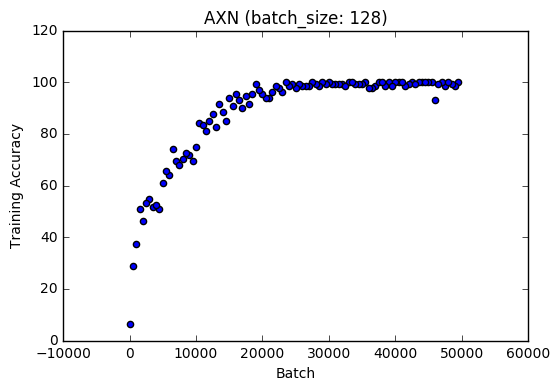

In [8]:


rs_axn = Results()
rs_axn.load('results/Baseline/baseline_axn')
result_axn = rs_axn.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_axn.params['time']))
print('Accuracy of model against test data: {}'.format(result_axn.params['accuracy']))

plotAccuracy('AXN (batch_size: {})'\
             .format(result_axn.params['batch_size']), result_axn.epochs)
      

Time taken to train model: 23.04 mins
Accuracy of model against test data: 73.47


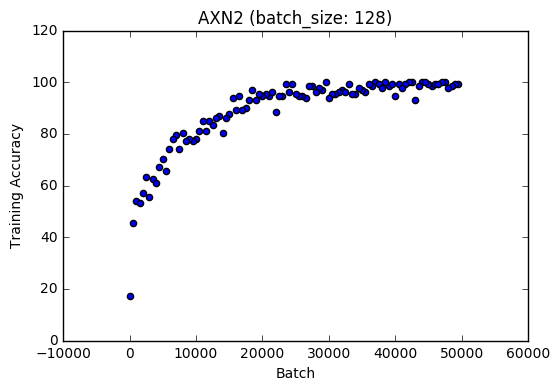

In [9]:
rs_axn2 = Results()
rs_axn2.load('results/Baseline/baseline_axn2')
result_axn2 = rs_axn2.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_axn2.params['time']))
print('Accuracy of model against test data: {}'.format(result_axn2.params['accuracy']))


plotAccuracy('AXN2 (batch_size: {})'\
             .format(result_axn2.params['batch_size']), result_axn2.epochs)

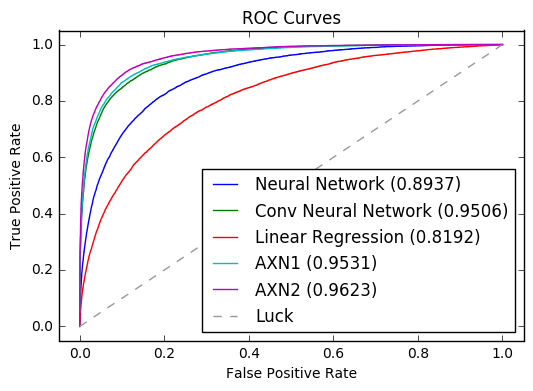

      Time(mins)  Accuracy
LR      5.26        41.39
NN      3.32        53.58
CNN    10.82        69.04
AXN1   26.44        70.69
AXN2   23.04        73.47


In [10]:
# Compute ROC curve and Area Under the Curve

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_nn.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Neural Network ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_cnn.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Conv Neural Network ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_lr.test_preds.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Linear Regression ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_axn.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='AXN1 ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_axn2.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='AXN2 ({})'.format(roc_auc.round(4)))


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

print('      Time(mins)  Accuracy')
print('LR      {}        {}'.format(result_lr.params['time'], result_lr.params['accuracy']))
print('NN      {}        {}'.format(result_nn.params['time'], result_nn.params['accuracy']))
print('CNN    {}        {}'.format(result_cnn.params['time'], result_cnn.params['accuracy']))
print('AXN1   {}        {}'.format(result_axn.params['time'], result_axn.params['accuracy']))
print('AXN2   {}        {}'.format(result_axn2.params['time'], result_axn2.params['accuracy']))

### 6 b) Comparing Optimizers

We chose to look at a number of different optimisers and how the AXN2 model's accuracy would be affected. We looked at:
* Adam
* Adagrad
* Adadelta
* Stochastic Gradient Descent

We initially ran tests with the default parameters for each optimizer and using a batch size of 128 and we ran 50000 batches. The training accuracy of all four tended to reach close to 100% in the training data by around 30000 iterations. The final results in the ROC curves shows very little difference between the AUC. The accuracy of the worst performer was 71.93 for Stochastic Gradient Descent and the best was 72.88 for Adagrad.

To see how hyper-parameters for optimizers are important we re-ran the tests but performed Grid Search. We limited the number of batches to 20000 in order to speed up searching. Even with this compromise the grid search took over 24 hours to complete.

For Adam parameters we searched over:
<code>
    learning_rates = { 0.1, 0.01, 0.001, 0.0001 }
    beta1s = { 0.8, 0.9, 0.99, 0.999 }
    beta2s = { 0.8, 0.9, 0.99, 0.999 }
    epsilons = { 1e-10, 1e-8, 1e-6, 1e-4 }
</code>
For Adadelta parameters we searched over:
<code>
    learning_rates = { 0.1, 0.01, 0.001, 0.0001 }
    rhos = { 0.8, 0.9, 0.95, 0.999 }
    epsilons = { 1e-10, 1e-8, 1e-6, 1e-4 }
</code>
For Adagrad parameters we searched over:
<code>
    learning_rates = { 0.1, 0.01, 0.001, 0.0001 }
    initial_accumulator_values = {0.001, 0.01, 0.1, 1}
</code>
For Gradient Descent we searched over:
<code>
    learning_rates = { 0.1, 0.01, 0.001, 0.0001 }
</code>

The results, below, depict the best accuracy score for each optimiser.
From the results we can see that, even with a lower number of batches, hyper-tuning of the optimizer parameters does produce better results. Adagrad is still the best performing optimiser and increases from 72.88 to 74.55, even given less time to train. This model had parameters learning rate = 0.001, and initial accumulator value = 0.01

Time taken to train model: 9.44 mins
Accuracy of model against test data: 74.24


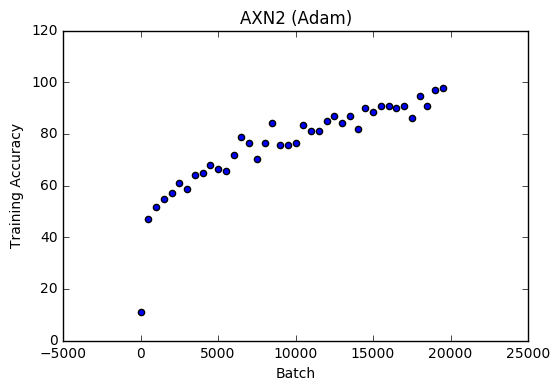

In [11]:
rs_opt1 = Results()
rs_opt1.load('results/AXN2Params/hyper/Adam')
result_opt1 = rs_opt1.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_opt1.params['time']))
print('Accuracy of model against test data: {}'.format(result_opt1.params['accuracy']))

plotAccuracy('AXN2 (Adam)', result_opt1.epochs)

Time taken to train model: 9.41 mins
Accuracy of model against test data: 74.55


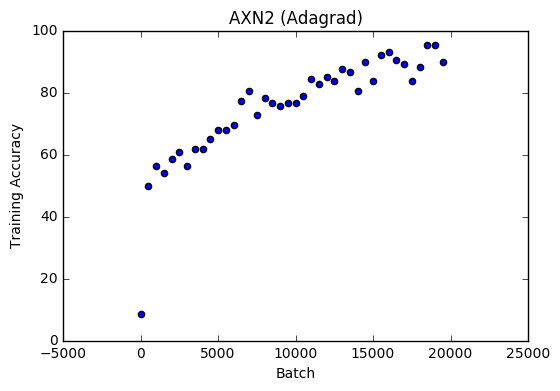

In [12]:
rs_opt2 = Results()
rs_opt2.load('results/AXN2Params/hyper/Adagrad')
result_opt2 = rs_opt2.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_opt2.params['time']))
print('Accuracy of model against test data: {}'.format(result_opt2.params['accuracy']))

plotAccuracy('AXN2 (Adagrad)', result_opt2.epochs)

Time taken to train model: 9.35 mins
Accuracy of model against test data: 73.62


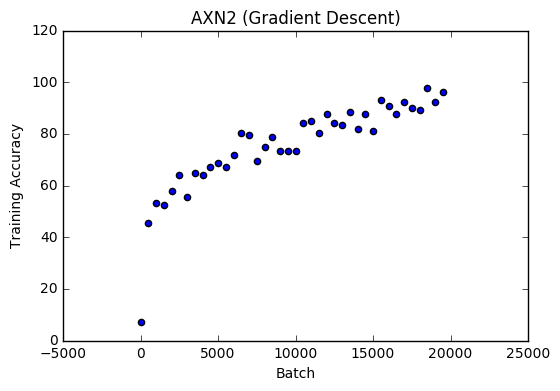

In [13]:
rs_opt3 = Results()
rs_opt3.load('results/AXN2Params/hyper/GD')
result_opt3 = rs_opt3.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_opt3.params['time']))
print('Accuracy of model against test data: {}'.format(result_opt3.params['accuracy']))

plotAccuracy('AXN2 (Gradient Descent)', result_opt3.epochs)

Time taken to train model: 9.3 mins
Accuracy of model against test data: 73.97


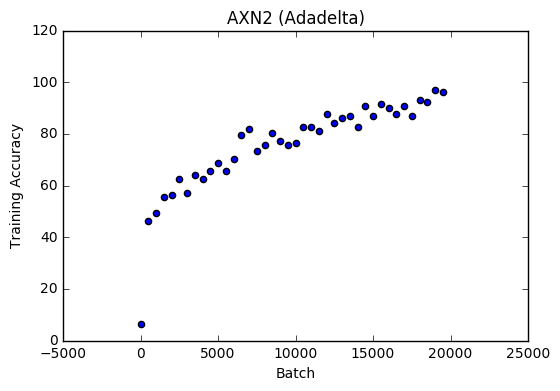

In [14]:
rs_opt4 = Results()
rs_opt4.load('results/AXN2Params/hyper/Adadelta')
result_opt4 = rs_opt4.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_opt4.params['time']))
print('Accuracy of model against test data: {}'.format(result_opt4.params['accuracy']))

plotAccuracy('AXN2 (Adadelta)', result_opt4.epochs)

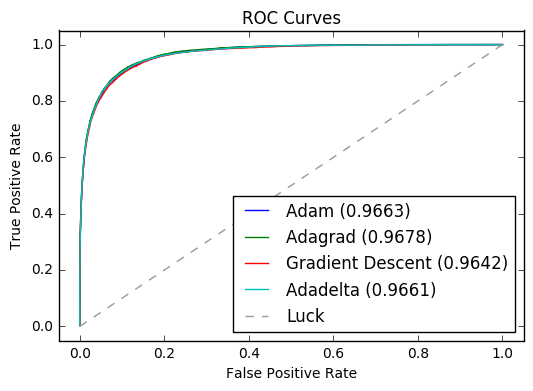

      Time(mins)  Accuracy
Adam       9.44        74.24
Adagrad    9.41        74.55
GD         9.35        73.62
Adadelta   9.3         73.97


In [15]:
# Compute ROC curve and Area Under the Curve

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_opt1.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Adam ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_opt2.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Adagrad ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_opt3.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Gradient Descent ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_opt4.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Adadelta ({})'.format(roc_auc.round(4)))


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

print('      Time(mins)  Accuracy')
print('Adam       {}        {}'.format(result_opt1.params['time'], result_opt1.params['accuracy']))
print('Adagrad    {}        {}'.format(result_opt2.params['time'], result_opt2.params['accuracy']))
print('GD         {}        {}'.format(result_opt3.params['time'], result_opt3.params['accuracy']))
print('Adadelta   {}         {}'.format(result_opt4.params['time'], result_opt4.params['accuracy']))

## 7) Maximising performance of CNN

### Does centering the data make a difference?

The baseline model for AXN2 divides each pixel by 255 ensuring that the data is between 0 and 1. Is it important to centre it as well? We compared a model that centres the values versus one that doesn't.

Our results indicate that with centering the data the accuracy was slightly less than uncentred (71.95 vs 73.47). Therefore, we keep with the original transformation.

Time taken to train model: 23.19 mins
Accuracy of model against test data: 71.95


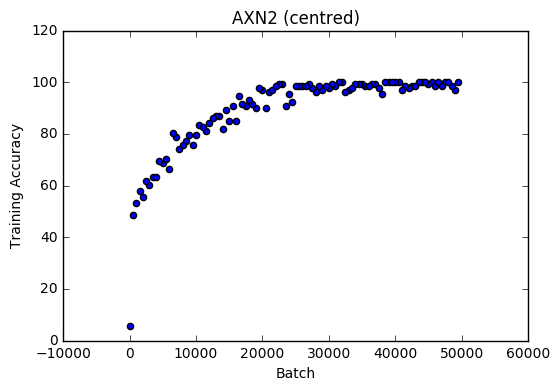

In [16]:
rs_centre = Results()
rs_centre.load('results/AXN2Params/centre')
result_centre = rs_centre.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_centre.params['time']))
print('Accuracy of model against test data: {}'.format(result_centre.params['accuracy']))

plotAccuracy('AXN2 (centred)', result_centre.epochs)

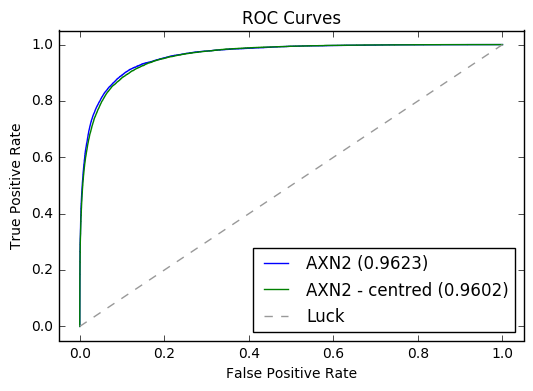

        Time(mins)    Accuracy
AXN2       23.04        73.47
AXN2(c)    23.19        71.95


In [17]:
# Compute ROC curve and Area Under the Curve

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_axn2.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='AXN2 ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_centre.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='AXN2 - centred ({})'.format(roc_auc.round(4)))


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

print('        Time(mins)    Accuracy')
print('AXN2       {}        {}'.format(result_axn2.params['time'], result_axn2.params['accuracy']))
print('AXN2(c)    {}        {}'.format(result_centre.params['time'], result_centre.params['accuracy']))


### What is the effect of batch size?

We changed the batch size, while keeping all other parameters constant, to see what effect it would have. From the graphs, below, we see that 128 & 256 perform better than smaller values. However, given that the model takes twice as long to learn for a batch size of 256 over 128 for very little gain, the additional computing time would probably be better spent utilising other techniques. We'll use 128 as our best batch size.

Time taken to train model: 7.11 mins
Accuracy of model against test data: 73.58


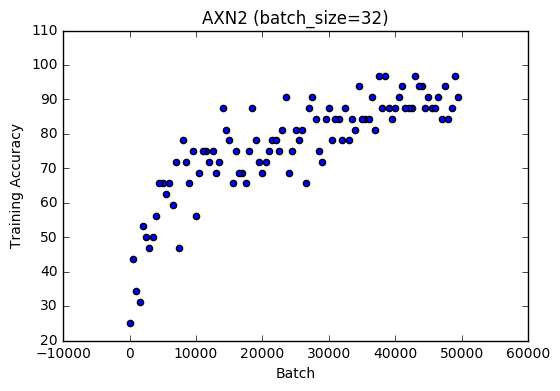

In [18]:
rs_batch32 = Results()
rs_batch32.load('results/AXN2Params/batchsize/32')
result_batch32 = rs_batch32.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_batch32.params['time']))
print('Accuracy of model against test data: {}'.format(result_batch32.params['accuracy']))

plotAccuracy('AXN2 (batch_size=32)', result_batch32.epochs)

Time taken to train model: 12.56 mins
Accuracy of model against test data: 72.17


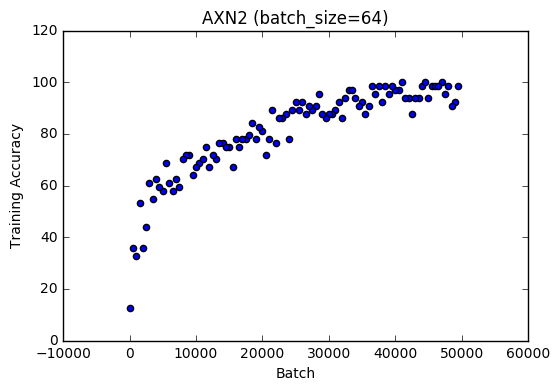

In [19]:
rs_batch64 = Results()
rs_batch64.load('results/AXN2Params/batchsize/64')
result_batch64 = rs_batch64.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_batch64.params['time']))
print('Accuracy of model against test data: {}'.format(result_batch64.params['accuracy']))

plotAccuracy('AXN2 (batch_size=64)', result_batch64.epochs)

Time taken to train model: 42.57 mins
Accuracy of model against test data: 72.7


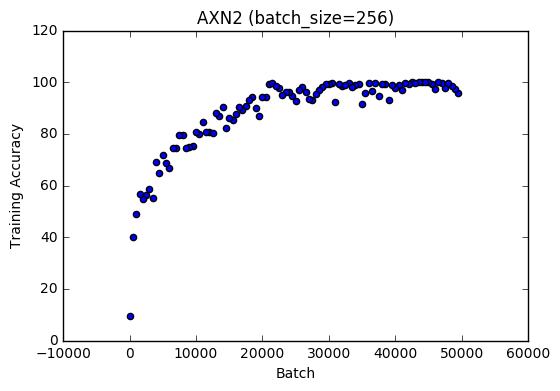

In [20]:
rs_batch256 = Results()
rs_batch256.load('results/AXN2Params/batchsize/256')
result_batch256 = rs_batch256.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_batch256.params['time']))
print('Accuracy of model against test data: {}'.format(result_batch256.params['accuracy']))

plotAccuracy('AXN2 (batch_size=256)', result_batch256.epochs)

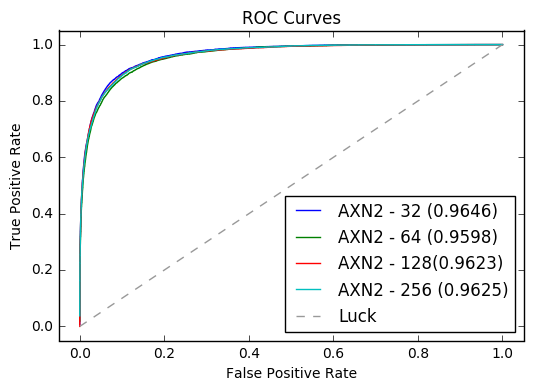

          Time(mins)  Accuracy
AXN2  (32)       7.11        73.58
AXN2  (64)      12.56        72.17
AXN2 (128)      23.04        73.47
AXN2 (256)      42.57        72.7


In [21]:
# Compute ROC curve and Area Under the Curve


fpr, tpr, thresholds = roc_curve(labels.ravel(), result_batch32.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='AXN2 - 32 ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_batch64.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='AXN2 - 64 ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_axn2.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='AXN2 - 128({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_batch256.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='AXN2 - 256 ({})'.format(roc_auc.round(4)))


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

print('          Time(mins)  Accuracy')
print('AXN2  (32)       {}        {}'.format(result_batch32.params['time'], result_batch32.params['accuracy']))
print('AXN2  (64)      {}        {}'.format(result_batch64.params['time'], result_batch64.params['accuracy']))
print('AXN2 (128)      {}        {}'.format(result_axn2.params['time'], result_axn2.params['accuracy']))
print('AXN2 (256)      {}        {}'.format(result_batch256.params['time'], result_batch256.params['accuracy']))

### The effects of more batches

In part 4 we investigated the effect of the size of the training data had on results. In this section, we keep the data constant at 50,000 images but vary the number of batches that we use to train the model with. This is only feasible with a GPU as we will train with up to half a million batches.

We tried values of 20,000, 50,000, and 500,000. For all tests batch size was 128 and optimiser was Adagrad.

The accuracy using 500,000 iterations jumps to <b>76%</b>

In [22]:

rs_500k = Results()
rs_500k.load('results/Batches/500k')
result_AXN2_500k = rs_500k.highest('accuracy')

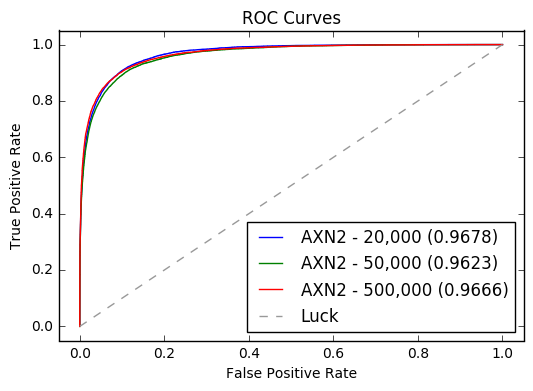

          Time(mins)  Accuracy
 20,000      9.41        74.55
 50,000     23.04        73.47
500,000    226.32        76.07


In [23]:


fpr, tpr, thresholds = roc_curve(labels.ravel(), result_opt2.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='AXN2 - 20,000 ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_axn2.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='AXN2 - 50,000 ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_AXN2_500k.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='AXN2 - 500,000 ({})'.format(roc_auc.round(4)))


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

print('          Time(mins)  Accuracy')
print(' 20,000      {}        {}'.format(result_opt2.params['time'], result_opt2.params['accuracy']))
print(' 50,000     {}        {}'.format(result_axn2.params['time'], result_axn2.params['accuracy']))
print('500,000    {}        {}'.format(result_AXN2_500k.params['time'], result_AXN2_500k.params['accuracy']))




### Results

Our best model was the complex AlexNet model (AXN2) tuned to have batch size of 128 with an Adagrad optimiser tuned with parameters learning rate = 0.001, and initial accumulator value = 0.01. More training helped it achieve better results, and with half a million batches it achieved an accuracy of <b>76% (with an AUC of 0.96)</b>

Viewing the predicted vs actual images (as shown bellow in confusion matrix) we see that we have managed to classify most images well (a number are over 80%) but that some of the images are particularly troublesome for this implementation. Further analysis would be required to see whether we can preprocess the data to increase the accuracy on these images.

In [24]:
from sklearn.metrics import confusion_matrix
shaped = np.reshape(result_AXN2_500k.test_preds, (10000, 10))
preds = np.argmax(shaped,axis=1)
lbl = np.argmax(labels,axis=1)

print("Confusion matrix:\n{}".format(confusion_matrix(lbl, preds)))

Confusion matrix:
[[817  16  44  12  20   5  11   6  43  26]
 [ 19 861   8  12   3   5   9   1  12  70]
 [ 57  13 663  64  83  48  35  20  10   7]
 [ 18  12  60 594  63 128  65  39   8  13]
 [ 18   7  59  61 721  33  41  50   7   3]
 [ 11   1  44 168  46 645  29  45   4   7]
 [ 10   5  43  59  27  14 830   2   4   6]
 [ 17   7  25  32  49  52   9 795   2  12]
 [ 52  23  17  12   6   8   2  11 848  21]
 [ 24  67   7  10   9   7   6  18  19 833]]


## Exploratory Points


<b>A)</b> We used and optimised two different classifiers (instead of one as it was required by HW specification), namely logistic regression classifier and KNN classifier. Please see the description in part 3c) of this homework for the description of our in-depth optimisation of these two altorithms.

<b>B)</b> We evaluated and compared 3 different image distortion methods (instead of one method as it was required by HW specification). Please see part 5) of this homework for the description of these.

<b>C)</b> Enabling Execution of NN/CNN Classifiers for Haris Memic member of this HW<br /><br />

This part was a painful experience we had to go through. Personal computer resources for Haris Memic consist of a MacBook Pro with 4GB of memory. Running NN and CNN classifiers turned out not to be a realistic task for this computer. For this reason Haris started with running NN/CNN classifiers on a 20vCPU instance which was still being rented for the previous HW (HW3, for which we forgot to elaborate on this usage for the exploratory points! :(. The execution on the Linode's server was succesful, however the decision was made to cancel Linode server and go for an Amazon's AWS EC2 GPU-enable instance. Experimentation with a non-GPU instance wasn't making classifiers run efficient. As a consequence (and as few days were already spent trying to run NN/CNN models efficiently) the decision was made to rent a best performing GPU-enabled instance that could fit into the budget limits, namely:
> g2.2xlarge

The description of this instance, taken from Amazon's website, is displayed below.

In [25]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "amazon_instance.png")

Unfortunatelly it turned out that getting access to this (and other GPU-instances) is not an automated procedure as with other "normal" Amazon instances. It took 2 full days to get this instance approved (and this after about 10 sent messages and multiple exchanged messages to AWS support personnel). This, sadly, together with earlier attempts to run NN/CNN classifiers consumed a number of days.<br />
Eventually the instance was approved, and the work on the homework could be initiated.

<b>D)</b> Building a GPU enabled workstation for Rob Johnston member of this assignment.

Once Rob made the decision to build a dedicated workstation there were two sources of information he found that were constantly coming up in Google searches,  <a href="https://developer.nvidia.com/deep-learning-getting-started">NVIDEAs Accelerated Computing programme</a> and <a href="http://timdettmers.com">Tim Dettmers blog posts on building a GPU enabled machine</a>. He took his inspiration from NVIDIAs <a href="https://developer.nvidia.com/devbox">dev box</a> but pared it down slightly. Well, a lot really. 

The concensus seemed to be if you're doing a lot of deep learning then get four of the biggest graphics cards you can and don't worry about the rest. However, not all libraries use the GPU and so a pragmatic approach is to also consider traditional horsepower through CPU & memory.

Simply put, the GPUs most important features are:
* raw power (for NVIDIA cards this is expressed in CUDA cores)
* Memory. The model will run in the GPU's memory so too small an onboard GPU memory will mean that you can't run your model.

This <a href = "https://www.vrfocus.com/2016/07/a-comparison-guide-for-nvidias-new-titan-x-1080-1070-and-1060-graphics-cards/">post</a> gives a useful comparison of the latest NVIDIA cards:

<img src='cards.png'/>

Consumer level graphis cards tend to max out at 8Gb memory so Rob chose this as his limit. For the raw computing power he compromised on a GTX1070. He also only chose one graphics card; a 'real' ML machine has four Titan cards!

Completing the build was an Asus X99 motherboard, 32Gb RAM and an Intel i7 6800K Broadwell chip. He thought he could reuse an existing CPU fan and power supply unit, but, as luck would have it they were too old and had the wrong connectors. Back to the shop ....

On the software side he installed the latest Ubuntu version and followed the tensorflow install instructions. This took a few days as there is a seperate GPU version of tensorflow and it's not straightforward to use it with Anaconda. In the end he abandoned Anaconda on the workstation as it was just too hard to setup.


His first test was to compare his 2013 Macbook Pro (i7, 16Gb RAM) with the new machine on a neural network model used in section. This ran in 13.6 mins on the macbook and 2.7 mins on the GPU enabled workstation. A considerable improvement.

As a final note, once you start using a GPU you become aware of the limitations on the GPU's memory. Even the Titan X only has 12 Gb RAM and some of the CNNs will gladly need more than that. Rob found that in his AlexNet implementation he couldn't create a graph and use it to train and then evaluate the test dataset as it would run out of memory. The solution was relatively simple; move the evaluation of the test dataset onto the CPU as it only runs once at the end. It also proved that you can't just rely on GPU power alone.


As a note, all of the timings in this notebook for the neural network and convolutional neural networks were performed on this workstation.


